# Benchmark for query algorthems

## 1. getting the data

In [2]:
## /!\ to be executed only onses 
import sys
sys.path.insert(0, "..")

In [3]:
from wordtraveller import filemanager as fm
filemanager = fm.FileManager('allDocs' , '../workspace/'  )
Voc = filemanager.read_vocabulary()

print(len(Voc))

325354


In [4]:
print(Voc.pop("***NumberDifferentDocs***"))

131896


## 2. vocabulary analythis 
### a) gets the ten most frequant words

In [5]:
from sortedcontainers import SortedDict
worldsFreq = [0]*len(Voc)
priviousOffset = 0 
first = True
for i, world in enumerate(Voc): 
    worldsFreq[i] = (int(Voc[world]) -priviousOffset, world )
    priviousOffset = int(Voc[world])
worldsFreq.sort(reverse=True)
print(worldsFreq[0:10])

[(131997, '-'), (113786, '<number>'), (85006, 'said'), (62077, 'one'), (55571, 'two'), (54144, '--'), (52693, 'would'), (51461, 'also'), (50276, 'last'), (47889, 'new')]


### b) Zipf's low

In [6]:
import matplotlib.pyplot as plt

freqs = [0]*len(Voc)
priviousOffset = 0 
for i, world in enumerate(Voc): 
    freqs[i] = (Voc[world]) -priviousOffset
    priviousOffset = int(Voc[world])
    
freqs.sort(reverse=True)

plt.plot(freqs)
plt.ylabel('frequanc mot')
plt.xscale('log')
plt.yscale('log')
plt.show()

<Figure size 640x480 with 1 Axes>

on peut classer les mot de la fasson suivante: 

heighFreq = worldsFreq[10:100] # 50 000 > x > 15 000
middelFreq = worldsFreq[1000:5000] # 4500 > x > 800 
lowFreq =worldsFreq[50000: 150000] # 17 > x > 2 




## 3. Evaluation des performances 
### a) analyse de l'evalusiont du temps de calcule en fonction du nombre de resutat attenu

l'annalyse peut étres fait sur plusieur groups de mots: 

(4434, 'believes') (2077, 'coalition') (1434, 'matt')
(6411, 'build')
(7501, 'party') (6599, 'actually')(3802, 'jail') (4101, 'august')

In [7]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf, naivetopk
from sys import stdout
import time 




listOfWords = [[tuple[1]for tuple in worldsFreq[30:40]]]
print (listOfWords)



#words= ['build']
#words= ['party','actually','jail','august']




# 
size = 20

def f(k): 
    return k*k

totaleTimeTA = [[0]*len(listOfWords) for i in range(0,size)]
totaleTimeNaiv = [[0]*len(listOfWords) for i in range(0,size)]
totaleTimefag = [[0]*len(listOfWords) for i in range(0,size)]

totaleTimeTAAvg = [0]*size
totaleTimeNaivAvg = [0]*size
totaleTimefagAvg = [0]*size


for i,words in enumerate(listOfWords):
    for k in range(0,size):
        print("{}% ".format(round((i*size+k)/(len(listOfWords)*size)*100)), end="\r")
        sartingTime = time.time()
        resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, f(k))
        totaleTimeTA[k][i] = time.time() - sartingTime

        sartingTime = time.time()
        resutle = faginstopkvf.apply_top_k_algo(words, Voc, filemanager, 0, f(k))
        totaleTimefag[k][i] = time.time() - sartingTime

        sartingTime = time.time()
        naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0,f(k) )
        totaleTimeNaiv[k][i] = time.time() - sartingTime
        
print("finiched", end="\r")

for k in range(0,size):
    totaleTimeTAAvg[k]= sum(totaleTimeTA[k])/len(totaleTimeTA[k])
    totaleTimeNaivAvg[k]= sum(totaleTimeNaiv[k])/len(totaleTimeNaiv[k])
    totaleTimefagAvg[k]= sum(totaleTimefag[k])/len(totaleTimefag[k])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adril\AppData\Local\Temp...
[nltk_data]   Unzipping corpora\stopwords.zip.
[['much', 'angeles', 'city', 'still', 'week', 'four', 'take', 'san', 'going', 'good']]


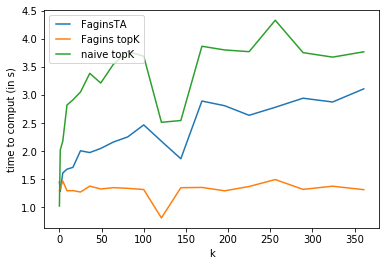

In [8]:
x = [0]*size
for i in range(1,size): 
    x[i] = f(i)
    

plt.plot(x,totaleTimeTAAvg, label="FaginsTA ")
plt.plot(x,totaleTimeNaivAvg, label="Fagins topK")
plt.plot(x,totaleTimefagAvg, label="naive topK ")

plt.ylabel('time to comput (in s)')
plt.xlabel('k')
plt.legend(numpoints=2)
plt.show()

### b) analyse de l'evalusiont du temps de calcule en fonction du nombre de mot dans la recherche 

In [10]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf, naivetopk
from sys import stdout
import time 




listOfWords = [[tuple[1]for tuple in worldsFreq[100:102]]]

print (listOfWords)

#words= ['build']
#words= ['party','actually','jail','august']




# 
size = 5

def f(k): 
    return k*k

totaleTimeTA = [[0]*len(listOfWords) for i in range(0,size)]
totaleTimeNaiv = [[0]*len(listOfWords) for i in range(0,size)]
totaleTimefag = [[0]*len(listOfWords) for i in range(0,size)]

totaleTimeTAAvg = [0]*size
totaleTimeNaivAvg = [0]*size
totaleTimefagAvg = [0]*size


for i,words in enumerate(listOfWords):
    for k in range(4,size):
        
        ## getting posting lists 
        posting_lists_ordered_by_id = dict()
        posting_lists_ordered_by_score = dict()
        for word in words:
            orderedById, orderedByScore = query.get_posting_list(Voc, word, filemanager, True)

            if orderedById and orderedByScore:
                posting_lists_ordered_by_score[word] = orderedByScore
                posting_lists_ordered_by_id[word] = orderedById
                
        posting_lists = [query.get_posting_list(Voc, word, filemanager) for word in words]
        
        #print (posting_lists_ordered_by_score)
        
        
        #print("{}% ".format(round((i*size+k)/(len(listOfWords)*size)*100)), end="\r")
        sartingTime = time.time()
        faginstavf.find_fagins_ta(posting_lists_ordered_by_id,
                          posting_lists_ordered_by_score, 0, f(k))
        totaleTimeTA[k][i] = time.time() - sartingTime

        sartingTime = time.time()
        aspected = faginstopkvf.find_fagins_top_k(posting_lists_ordered_by_id,
                      posting_lists_ordered_by_score, f(k), 'disjunctive')
        totaleTimefag[k][i] = time.time() - sartingTime

        sartingTime = time.time()
        resutle = naivetopk.naive_top_k_algo(posting_lists, f(k), get_docs_func=naivetopk.disjunctive_queries)
        totaleTimeNaiv[k][i] = time.time() - sartingTime

        
        print (aspected)
        print (resutle)
        
        is_equal = True 
        aspected.sort()
        resutle.sort()
        if len(aspected) == len(resutle) : 
            for a in range(0, len(resutle)): 
                if not (aspected[a][0]== resutle[a][0] and aspected[a][1]== resutle[a][1]):
                    is_equal= False
        else: 
            is_equal = False

        if not is_equal :
            print ("has not the same tuples")
        else: 
            print("has the same tuples")

print("finiched", end="\r")



for k in range(0,size):
    totaleTimeTAAvg[k]= sum(totaleTimeTA[k])/len(totaleTimeTA[k])
    totaleTimeNaivAvg[k]= sum(totaleTimeNaiv[k])/len(totaleTimeNaiv[k])
    totaleTimefagAvg[k]= sum(totaleTimefag[k])/len(totaleTimefag[k])

[['place', 'later']]
[(215344, 6.551472902297974), (288934, 5.83226203918457), (279541, 5.5270771980285645), (5461, 5.500096321105957), (69894, 5.279808759689331), (99753, 5.276797771453857), (77494, 5.166120290756226), (241654, 5.166120290756226), (172844, 5.1268017292022705), (296721, 5.124619960784912), (14532, 4.9458327293396), (218042, 4.9458327293396), (218663, 4.9458327293396), (254172, 4.944632053375244), (100392, 4.724344491958618), (218731, 4.724344491958618)]
[(215344, 6.551472902297974), (288934, 5.83226203918457), (260632, 5.529258966445923), (279541, 5.5270771980285645), (5461, 5.500096321105957), (164911, 5.437450408935547), (82554, 5.349837779998779), (317953, 5.279808759689331), (69894, 5.279808759689331), (99753, 5.276797771453857), (299483, 5.2393479347229), (70644, 5.209979772567749), (77494, 5.166120290756226), (241654, 5.166120290756226), (91653, 5.128349542617798), (172844, 5.1268017292022705)]
has not the same tuples


In [43]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf, naivetopk
from sys import stdout
import time 


# define words 
WordsList= [0]*1024
for i in range(0,1024): 
    WordsList[i]= worldsFreq[10000+i][1]
WordsList.sort(reverse=True)

# 
size = 20

def f(k): 
    return k


totaleTimeTAWords = [0]*size
totaleTimefagWords = [0]*size
totaleTimeNaivWords = [0]*size



for n in range(0,size):
    words = WordsList[0:n*n]
    print("{}% ".format(round((n)/(size)*100)), end="\r")
    sartingTime = time.time()
    resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, 30)
    totaleTimeTAWords[n] = time.time() - sartingTime

    sartingTime = time.time()
    resutle = faginstopkvf.apply_top_k_algo(words, Voc, filemanager, 0, 30)
    totaleTimefagWords[n] = time.time() - sartingTime

    sartingTime = time.time()
    naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0, 30)
    totaleTimeNaivWords[n] = time.time() - sartingTime
        
print("finiched", end="\r")


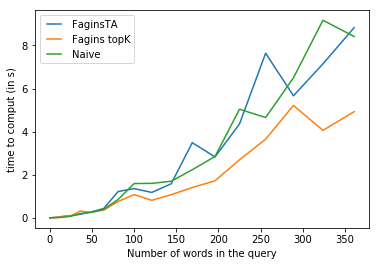

In [18]:
x = [0]*size
for i in range(1,size): 
    x[i] = i*i
    


plt.plot(x,totaleTimeTAWords, label="FaginsTA")
plt.plot(x,totaleTimefagWords, label="Fagins topK")
plt.plot(x,totaleTimeNaivWords, label="Naive")

plt.ylabel('time to comput (in s)')
plt.xlabel('Number of words in the query')
plt.legend(numpoints=2)
plt.show()

### c) analyse de l'evalusiont du temps de calcule en fonction de la tailles des posting lists

In [55]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf,naivetopk
import time 

# define words 


size = 19
nbIter = 5 
nbOfwords = 2

def f(i): 
    return i*i*100

ListWorlds = [[0] * nbOfwords for _ in range(size)]
for i in range(1,size+1): 
    ListWorlds[i-1] = [world[1] for world in worldsFreq if world[0]>=f(i) and world[0]<=f(i)*1.10][0:nbOfwords]
    if len(ListWorlds[i-1])!= nbOfwords : 
            print ("Le jeux de donnée n'est pas reproésentatife in faut changer les paramters")
            print ("les mots de taille {} poesent probleme seul {} / {}".format(f(i),len(ListWorlds[i-1]),nbOfwords ))
#print (ListWorlds)

totaleTimeTAPLAvg = [0]*size
totaleTimefagPLAvg = [0]*size
totaleTimeNaivPLAvg = [0]*size

totaleTimeTAPL = [[0]*nbIter for i in range(0,size)]
totaleTimeNaivPL = [[0]*nbIter for i in range(0,size)]
totaleTimefagPL = [[0]*nbIter for i in range(0,size)]


for k in range(0,nbIter):
    for n in range(0,size):
        print("{}% ".format(round((k*size+n)/(nbIter*size)*100)), end="\r")
        words = ListWorlds[n]




        sartingTime = time.time()
        faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, 15)
        totaleTimeTAPL[n][k] = time.time() - sartingTime

        sartingTime = time.time()
        faginstopkvf.apply_top_k_algo(words, Voc, filemanager, 0, 15)
        totaleTimefagPL[n][k] = time.time() - sartingTime

        sartingTime = time.time()
        naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0, 15 )
        totaleTimeNaivPL[n][k] = time.time() - sartingTime
print("finiched", end="\r")


for k in range(0,size):
    totaleTimeTAPLAvg[k]= sum(totaleTimeTAPL[k])/nbIter
    totaleTimefagPLAvg[k]= sum(totaleTimefagPL[k])/nbIter
    totaleTimeNaivPLAvg[k]= sum(totaleTimeNaivPL[k])/nbIter

[0, 100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000, 12100, 14400, 16900, 19600, 22500, 25600, 28900, 32400]


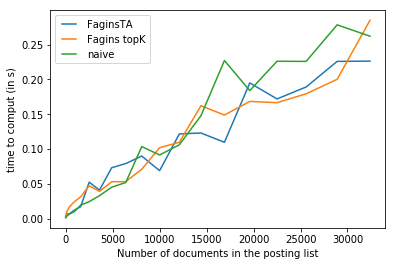

In [20]:
size = 19
nbIter = 5 
nbOfwords = 2

def f(i): 
    return i*i*100

x = [0]*size
for i in range(1,size): 
    x[i] = f(i)
    

print (x)
plt.plot(x,totaleTimeTAPLAvg, label="FaginsTA")
plt.plot(x,totaleTimefagPLAvg, label="Fagins topK") 
plt.plot(x,totaleTimeNaivPLAvg, label="naive")


plt.ylabel('time to comput (in s)')
plt.xlabel('Number of documents in the posting list')
plt.legend(numpoints=2)
plt.show()



### d) analyse de l'evalusiont du temps de calcule en fonction de epsilon pour TA

In [ ]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf, naivetopk
from sys import stdout
import time 




listOfWords = [[tuple[1]for tuple in worldsFreq[200:210]]]
#words= ['build']
#words= ['party','actually','jail','august']




# 
size = 20

def f(k,size): 
    return k/3/size



totaleTimeTAE = [[0]*len(listOfWords) for i in range(0,size)]


totaleTimeTAEAvg = [0]*size


for i,words in enumerate(listOfWords):
    for k in range(0,size):
        
        print("{}% ".format(round((i*size+k)/(len(listOfWords)*size)*100)), end="\r")
        sartingTime = time.time()
        resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, f(k,size), 20)
        totaleTimeTAE[k][i] = time.time() - sartingTime

        
print("finiched", end="\r")

for k in range(0,size):
    totaleTimeTAEAvg[k]= sum(totaleTimeTAE[k])/len(totaleTimeTAE[k])

In [ ]:
x = [0]*size
for i in range(1,size): 
    x[i] = f(i,size)
    

plt.plot(x,totaleTimeTAEAvg, label="FaginsTA ")



plt.ylabel('time to comput (in s)')
plt.xlabel('epsiolon ')
plt.legend(numpoints=2)
plt.show()

In [14]:
import time
from wordtraveller import faginstavf,naivetopk

words = [world[1] for world in worldsFreq[200:210]]

sartingTime = time.time()
faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, 15)
resutle = faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, 100)
totaletiem = time.time() - sartingTime
print ('time{}'.format(totaletiem))



aspected =  naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0, 100)


#print (aspected)
#print (resutle)
is_equal = True 
aspected.sort()
resutle.sort()
if len(aspected) == len(resutle) : 
    for i in range(0, len(resutle)): 
        if not (aspected[i][0]== resutle[i][0] and aspected[i][1]== resutle[i][1]):
            is_equal= False
else: 
    is_equal = False
    
if not is_equal :
    print ("has not the same tuples")
else: 
    print("has the same tuples")
    
    

   



time2.806492805480957
[(5461, 4.278315472602844), (155204, 3.9234416007995607), (211763, 3.744084858894348), (316254, 3.6861637592315675), (205243, 3.556128716468811), (323334, 3.415151286125183), (204882, 3.381671905517578), (6894, 3.3609981775283813), (47944, 3.3591891050338747), (121192, 3.346178483963013), (282554, 3.262967276573181), (203744, 3.2488231658935547), (281924, 3.124801182746887), (93134, 3.1032275438308714), (24092, 3.0978962659835814), (299483, 3.059166359901428), (260632, 3.0518312215805055), (150414, 3.0485816478729246), (280244, 3.0360249996185305), (6234, 3.0111249446868897), (102923, 3.0054314613342283), (185541, 2.935701608657837), (151912, 2.9219251394271852), (181812, 2.916266918182373), (241982, 2.912799286842346), (292503, 2.9096802473068237), (277573, 2.8955422401428224), (137561, 2.8935711860656737), (86283, 2.8846285820007322), (109043, 2.882876467704773), (235512, 2.879897141456604), (254001, 2.872017741203308), (39362, 2.868717074394226), (279962, 2.866

In [7]:
from wordtraveller import query
from wordtraveller import faginstavf, faginstopkvf,naivetopk
import time 

# define words 


size = 1
nbIter = 1 
nbOfwords = 2

def f(i): 
    return i*i*100

ListWorlds = [[0] * nbOfwords for _ in range(size)]
for i in range(1,size+1): 
    ListWorlds[i-1] = [world[1] for world in worldsFreq if world[0]>=f(i) and world[0]<=f(i)*1.10][0:nbOfwords]
    if len(ListWorlds[i-1])!= nbOfwords : 
            print ("Le jeux de donnée n'est pas reproésentatife in faut changer les paramters")
            print ("les mots de taille {} poesent probleme seul {} / {}".format(f(i),len(ListWorlds[i-1]),nbOfwords ))
#print (ListWorlds)

totaleTimeTAPLAvg = [0]*size
totaleTimefagPLAvg = [0]*size
totaleTimeNaivPLAvg = [0]*size

totaleTimeTAPL = [[0]*nbIter for i in range(0,size)]
totaleTimeNaivPL = [[0]*nbIter for i in range(0,size)]
totaleTimefagPL = [[0]*nbIter for i in range(0,size)]


for k in range(0,nbIter):
    for n in range(0,size):
        print("{}% ".format(round((k*size+n)/(nbIter*size)*100)), end="\r")
        words = ['zimbabw', 'whaler']
        print (words)





        sartingTime = time.time()
        r= faginstavf.apply_fagins_ta(words, Voc, filemanager, 0, 10)
        totaleTimeTAPL[n][k] = time.time() - sartingTime
        print (r)
        
        sartingTime = time.time()
        r= faginstopkvf.apply_top_k_algo(words, Voc, filemanager, 0, 10)
        totaleTimefagPL[n][k] = time.time() - sartingTime
        print (r)

        sartingTime = time.time()
        r= naivetopk.apply_naive_top_k_algo(words, Voc, filemanager, 0, 10 )
        totaleTimeNaivPL[n][k] = time.time() - sartingTime
        print (r)
print("finiched", end="\r")




['zimbabw', 'whaler']
[(130454, 23.08133888244629), (148132, 14.976445198059082), (872, 8.845330238342285), (12052, 8.845330238342285), (120043, 8.845330238342285), (122712, 8.845330238342285), (135342, 8.845330238342285), (149771, 8.845330238342285), (171611, 8.845330238342285), (177032, 8.845330238342285)]
[(130454, 23.08133888244629), (148132, 14.976445198059082), (872, 8.845330238342285), (12052, 8.845330238342285), (120043, 8.845330238342285), (122712, 8.845330238342285), (135342, 8.845330238342285), (149771, 8.845330238342285), (171611, 8.845330238342285), (177032, 8.845330238342285)]
[(130454, 11.540669441223145), (148132, 7.488222599029541), (191104, 4.422665119171143), (197124, 4.422665119171143), (872, 4.422665119171143), (177032, 4.422665119171143), (179274, 4.422665119171143), (120043, 4.422665119171143), (149771, 4.422665119171143), (183341, 4.422665119171143)]


In [54]:
WordsList= [0]*1024
for i in range(0,1024): 
    WordsList[i]= worldsFreq[10000+i][0]
print(WordsList)

[311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 310, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 309, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 307, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 306, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 305, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302,